<a href="https://colab.research.google.com/github/WanjohiChristopher/Zindi-Kenya-Sign-Language-Classification-Hack/blob/main/Kenyan_Sign_LanguageClassification_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q  fastai==1.0.61

In [2]:
# check version of fastai
import fastai

fastai.__version__

'1.0.61'

In [3]:
# connect to gdrive
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
import numpy as np 
import pandas as pd 

from fastai import *
from fastai.vision import *
from pathlib import Path
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:

image_path = '/content/drive/MyDrive/ZindiSignlanguage/Images'

### tfms helps to do data augmentation on the data to have a better pixel values

In [6]:
tfms=get_transforms(do_flip=True,flip_vert=True,max_lighting=0.5,max_zoom=2.0,max_warp=0.2,max_rotate=45)

### Read the data and pass the data augmentation function

In [7]:
df = pd.read_csv("/content/drive/MyDrive/ZindiSignlanguage/Train.csv")

In [8]:
df.head()

,img_IDS,Label
0,ImageID_33HMDMJ3,Temple
1,ImageID_V5POEX4O,Church
2,ImageID_89CCCCW6,Enough/Satisfied
3,ImageID_GNJXOWX5,Me
4,ImageID_7Q9LOP7R,Love


In [9]:
data = ImageDataBunch.from_df(image_path,
                              df,
                              size=224,
                              valid_pct=0.20,
                              ds_tfms=tfms,
                              num_workers=5,
                              bs=10,
                             suffix='.jpg').normalize(imagenet_stats)

In [10]:
# There are 9 classes!
print(data.c) 

9


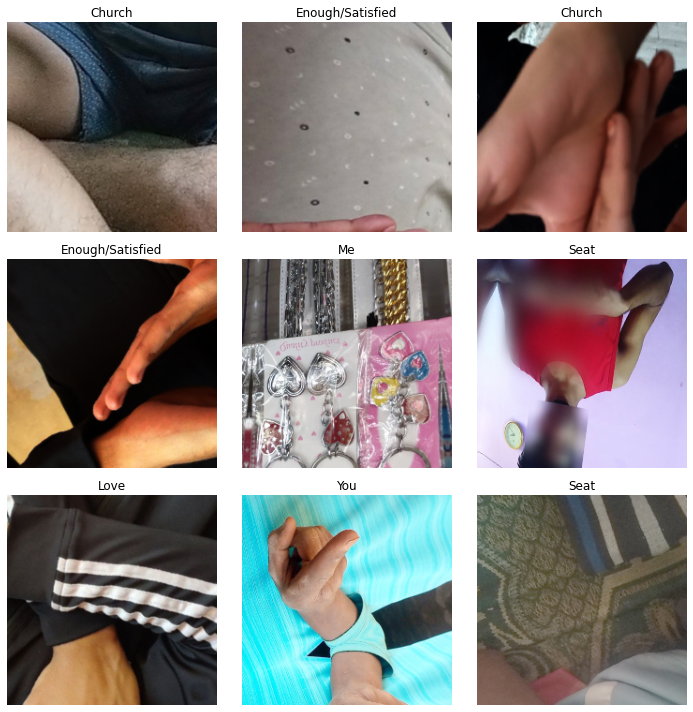

In [11]:
# Look at some examples
data.show_batch(rows=3, figsize=(10, 10)) 

### Modelling
Using Efficientnet Model

In [12]:
!pip install efficientnet-pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=142bbf8b81f6ede00f8c801eb404202701c6cf6d1d6559314d6846348cc34052
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [13]:
from efficientnet_pytorch import EfficientNet

In [14]:
learn = cnn_learner(data, models.resnet18, metrics=[error_rate, accuracy])
model = EfficientNet.from_name('efficientnet-b0')
#model._fc = nn.Linear(1280, data.c)
#learn = Learner(data, model,metrics=[error_rate, accuracy])
#learn.fit(n_epoch=200, lr=1e-7, cbs=EarlyStoppingCallback(monitor='valid_loss', min_delta=0.1, patience=2))



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
# Fit
num_epochs =9
learn.fit_one_cycle(num_epochs, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time


## predict on test set

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/ZindiSignlanguage/Test.csv")

In [ ]:
test_df.head()

In [ ]:
test = ImageList.from_df(test_df, image_path, suffix='.jpg')

In [ ]:
data.add_test(test)

In [ ]:
#predictions

In [ ]:
preds_test,y_test = learn.get_preds(DatasetType.Test)

In [ ]:
preds_test[:,i]

In [ ]:
y_test

In [ ]:
sub=pd.read_csv('/content/drive/MyDrive/ZindiSignlanguage/SampleSubmission.csv')
k=[]
for col in sub.columns: 
    k.append(col) # creating list of the label

In [ ]:
k

In [ ]:
import os
submission = pd.DataFrame()
submission["ID"] = test_df["img_IDS"]
for i, c in enumerate(learn.data.classes):
    print(c)
    submission[c] = preds_test[:,i]
submission.head()

In [ ]:
submission.to_csv('subf.csv', index=False)